<center>

![](https://i.pinimg.com/originals/51/ae/4b/51ae4b928ea815934b562d907ec5dd91.gif)

</center>

<div class="alert alert-block alert-info" style="font-size:20px;  background-color: #d1a6ff; font-family:verdana;color: #533078; border: 3px #533078 solid; border-radius: 15px;"><center>

## Why MNIST Balanced Dataset:

</center>
</div>

<b style="font-size:20px;">Balanced dataset:</b>

The EMNIST Balanced dataset is meant to address the balance issues in the ByClass and ByMerge datasets. It is derived from the ByMerge dataset to <span style="color:darkgoldenrod"> _reduce mis-classification errors_</span> due to capital and lower case letters and also has an <span style="color:darkgoldenrod"> _equal number of samples per class_</span>. This dataset is meant to be the most applicable.

<b style="font-size:20px;">About the dataset:</b>

<center>

<b>🐼train:</b> <span style="color:darkgoldenrod">112,800</span>
<b>🐼test:</b> <span style="color:darkgoldenrod">18,800</span>
<b>🐼total:</b> <span style="color:darkgoldenrod">131,600</span>
<b>🐼classes:</b> <span style="color:darkgoldenrod">47 (balanced)</span>

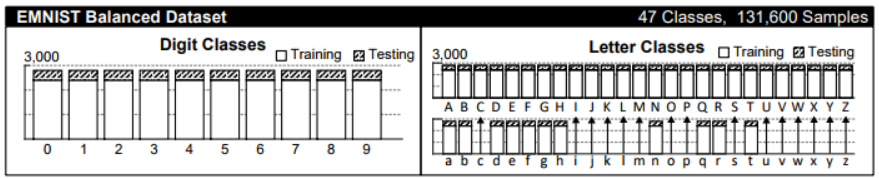

</center>
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana; border-radius:15px;">
<center>

##  📄 Starting with the DATA

</center>
</div>

<b style="font-size:20px;">CSV (combined labels and images):</b>

1) Each row is a separate image
2) 785 columns
3) First column = class_label (see mappings.txt for class label definitions)
4) Each column after represents one pixel value (784 total for a 28 x 28 image)

In [1]:
import pandas as pd

<b style="font-size:20px;">First Step:</b>

1) Read both csv files <br>

    🐼 <span style="color:darkgoldenrod"> _Train DataSet_</span> <br>
    🐼 <span style="color:darkgoldenrod"> _Test DataSet_</span> <br>
    
2) Checking that both files contain <span style="color:darkgoldenrod"> _785_</span> columns.

3) Checking that the data contains <span style="color:darkgoldenrod"> _47_</span> different classes from <span style="color:darkgoldenrod"> _0_</span> to <span style="color:darkgoldenrod"> _46_</span> .

4) Changing the column names so the first coulmn will be <span style="color:darkgoldenrod"> _label_</span> and the other columns will be <span style="color:darkgoldenrod"> _the pixel number_</span> .

5) Mapping each number in the label column with its actual meaning as 1 to be <span style="color:darkgoldenrod"> _1_</span> and 10 to be <span style="color:darkgoldenrod"> _A_</span> .


In [2]:
train_df = pd.read_csv('./emnist-balanced-train.csv')
test_df = pd.read_csv('./emnist-balanced-test.csv')

print("The shape of train dataset (rows, cols): " + str(train_df.shape))
print("The shape of test  dataset (rows, cols): " + str(test_df.shape))
print("The value of the min class label: " + str(train_df.iloc[:,0].min()), "The value of the max class label: " + str(train_df.iloc[:,0].max()))

The shape of train dataset (rows, cols): (112799, 785)
The shape of test  dataset (rows, cols): (18799, 785)
The value of the min class label: 0 The value of the max class label: 46


In [3]:
column_names = ['label'] + [str(i) for i in range(1, 784 + 1)]

train_df.columns = column_names
test_df.columns = column_names
train_df.columns

In [4]:
train_df['label'].unique()

array([36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3, 40,
       14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31, 16,
        7,  2,  8, 10,  6, 27, 45, 33, 11, 18, 41,  0, 21], dtype=int64)

In [2]:
mapping = pd.read_csv("emnist-balanced-mapping.txt", 
                        delimiter=' ', 
                        index_col=0, 
                        header=None)

mapping = mapping.squeeze('columns')

print(mapping.head())

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64


In [3]:
map_dict = {}
for index, m in enumerate(mapping):
    map_dict[index] = chr(m)

map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

<b style="font-size:20px;">Second Step:</b>

1) Split the data to <br>

    🐼 <span style="color:darkgoldenrod"> _x_</span> which contains the  <span style="color:darkgoldenrod"> _features_</span><br>
    🐼 <span style="color:darkgoldenrod"> _y_</span> which contains the  <span style="color:darkgoldenrod"> _labels_</span><br>


    `x = train_df.iloc[:, 1:].values` -> Select all rows by using <span style="color:darkgoldenrod"> <b>`:`</b></span> , Select all cols from the 2nd column to the last by using <span style="color:darkgoldenrod"> <b>`1:`</b></span>

    `y = train_df.iloc[:, 0].values`  -> Select all rows by using <span style="color:darkgoldenrod"> <b>`:`</b></span> , Select only the first column by using <span style="color:darkgoldenrod"> <b>`0`</b></span>

In [5]:
x_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print("The shape of x: " + str(x_train.shape))
print("The shape of y: " + str(y_train.shape))

The shape of x: (112799, 784)
The shape of y: (112799,)


<b style="font-size:20px;">Third Step:</b>

1) Normalization of Pixel Values: <br>

    🐼 <span style="color:darkgoldenrod"> _Xtrain_</span> diving the values by <span style="color:darkgoldenrod"> _255_</span>, so the values will be in range <span style="color:darkgoldenrod">[0, 1]</span><br>
    🐼 <span style="color:darkgoldenrod"> _Xtest_</span> diving the values by <span style="color:darkgoldenrod"> _255_</span>, so the values will be in range <span style="color:darkgoldenrod">[0, 1]</span><br>
    
    --> So this improves the performance and speeds up the training process.

In [6]:
norm_train = x_train / 255.0
norm_test = x_test / 255.0

In [7]:
print(norm_train.shape, y_train.shape)
norm_test.shape, y_test.shape

(112799, 784) (112799,)


((18799, 784), (18799,))

<b style="font-size:20px;">Forth Step:</b>

The data is skewed, so we will rotate them.

### Before:

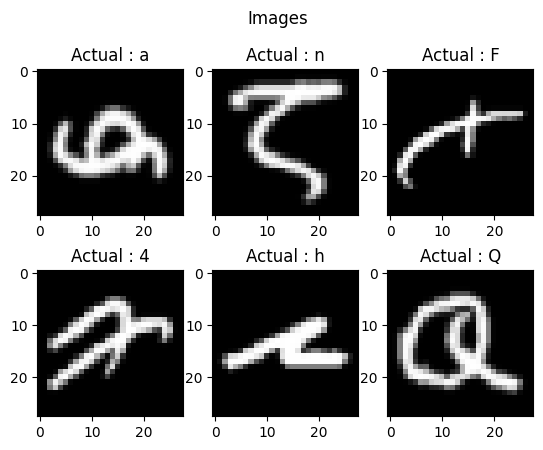

In [11]:
import matplotlib.pyplot as plt
plt.suptitle('Images')
for i in range(6):
    image = norm_train[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.title(f"Actual : {map_dict[y_train[i]]}")
    plt.imshow(image,cmap="gray")
    plt.grid(False)

plt.show()

In [8]:
import numpy as np
def flip(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [9]:
norm_train = np.apply_along_axis(flip, 1, norm_train).reshape(-1, 784)
norm_test = np.apply_along_axis(flip, 1, norm_test).reshape(-1, 784)
print(norm_train.shape)
norm_test.shape

(112799, 784)


(18799, 784)

### After

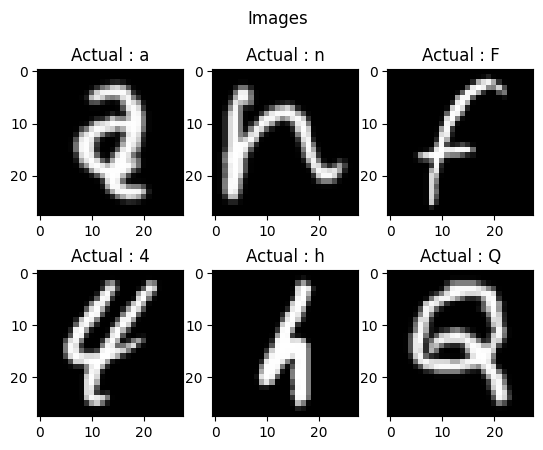

In [14]:
plt.suptitle('Images')
for i in range(6):
    image = norm_train[i].reshape((28,28))
    plt.subplot(2,3,i+1)
    plt.title(f"Actual : {map_dict[y_train[i]]}")
    plt.imshow(image,cmap="gray")
    plt.grid(False)

plt.show()

<b style="font-size:20px;">Fifth Step:</b>

1) For CNN and ANN: <br>

    🐼 <span style="color:darkgoldenrod">One hot encoding</span> of numpy array, so the lables in y_train and y_test are converted to columns, each <span style="color:darkgoldenrod">neuron</span> in the <span style="color:darkgoldenrod">output layer</span> represents a <span style="color:darkgoldenrod">class</span>, and the network predicts the probability of the input belonging to each class. The <span style="color:darkgoldenrod">_one-hot encoded labels align perfectly with this setup_</span>: each row in the one-hot encoded matrix corresponds to a sample, and the columns correspond to the classes, with a '1' indicating the presence of that class for that sample.

In [64]:
y_trainDeep = y_train.copy()
y_testDeep = y_test.copy()

print(y_trainDeep.shape)
print(y_testDeep.shape)

(112799,)
(18799,)


In [65]:
from keras.utils import to_categorical

y_trainDeep = to_categorical(y_trainDeep, 47)
y_testDeep = to_categorical(y_testDeep, 47)

print(y_trainDeep.shape)
print(y_testDeep.shape)

(112799, 47)
(18799, 47)


### For CNN:

    🐼 The first layer of a CNN convolutional layer. Convolutional layers in Keras expect input data in the shape [batch_size, height, width, channels]. Reshaping the input data to this shape ensures compatibility with the convolutional layer.


In [68]:
x_trainDeep = norm_train.copy()
x_testDeep = norm_test.copy()

print(x_trainDeep.shape)
print(x_testDeep.shape)

(112799, 784)
(18799, 784)


In [69]:
x_trainDeep = x_trainDeep.reshape(-1, 28, 28, 1)
x_testDeep = x_testDeep.reshape(-1, 28, 28, 1)

print(x_trainDeep.shape)
print(x_testDeep.shape)

(112799, 28, 28, 1)
(18799, 28, 28, 1)


In [70]:
print("Train shape for RF", str((norm_train.shape, y_train.shape)))
print("Train shape for ANN", str((norm_train.shape, y_trainDeep.shape)))
print("Train shape for CNN", str((x_trainDeep.shape, y_trainDeep.shape)))

Train shape for RF ((112799, 784), (112799,))
Train shape for ANN ((112799, 784), (112799, 47))
Train shape for CNN ((112799, 28, 28, 1), (112799, 47))


<div class="alert alert-block alert-info" style="font-size:20px; border-radius : 15; background-color: #abffd1; font-family:verdana; color: #003819; border: 2px #003819 solid; border-radius: 15px;">

<center>

## Generating ANN model

</center>
</div>

## 🏗️Import Libraries:

1) <strong>import Sequential:</strong> To intialaise our neural network model as a <span style="color:darkgoldenrod">Sequential Network</span>, there are 2 basic ways of <strong>Intialising a neural network:</strong><center><span style="color:darkgoldenrod">Sequence of layers</span> or as a <span style="color:darkgoldenrod">Graph</span><span style="color:darkgoldenrod">.</span></center>                                
<br>


4) <strong>import Dense:</strong> Ts a layer that is <span style="color:darkgoldenrod">deeply connected with its preceding layer</span> which means the neurons of the layer are <span style="color:darkgoldenrod">connected to every neuron of its preceding layer</span>.

Keras Dense Layer Hyperparameters:
1) Units: number of neurons in the layer 

2) Activation function (Sigmoid and Relu): is used for the transformation of the input values of neurons.                                                                                               

3) It introduces the non-linearity into the networks of neural networks so that the networks can learn the relationship between the input and output values.

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf

In [72]:
ANNMODEL = tf.keras.Sequential()
ANNMODEL.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(784,)))
ANNMODEL.add(Dense(256, kernel_initializer='normal', activation='relu'))
ANNMODEL.add(Dense(100, kernel_initializer='normal', activation='relu'))
ANNMODEL.add(Dense(47, kernel_initializer='normal', activation='softmax'))

## Compiling ANN Model:

<br>

<center><span style="color:darkgoldenrod">After we have completed building our ANN model, it's time to compile it.</span></center>

<br>

1) <strong>Optimizer:</strong> 
This line instantiates an <span style="color:darkgoldenrod">Adamax optimizer</span> object with a specified <span style="color:darkgoldenrod">learning rate of 0.001</span>.

2) <strong>Loss:</strong> 
To choose the <span style="color:darkgoldenrod">loss function </span>This loss function is commonly used for <span style="color:darkgoldenrod">multi-class</span> classification problems, setting <br> `from_logits=True` : means in the loss function allows you to work directly with logits during training, while ensuring that the loss computation is performed correctly by internally <span style="color:darkgoldenrod">applying the softmax function to obtain probabilities for computing the loss</span>. This approach provides numerical stability and improves the training process.

3) <strong>Metrics:</strong> 
To choose the <span style="color:darkgoldenrod">performance metric</span>.

### Why adam optimizer?

1) Adam optimizer is an algorithm created to optimize the gradient descent. It is a combination of two algorithms; <span style="color:darkgoldenrod">gradient descent momentum </span> and <span style="color:darkgoldenrod">root mean square propagation</span> .                                                                                        

2) Gradient descent momentum algorithm is used to <span style="color:darkgoldenrod">accelerate the gradient descent</span> by taking the <span style="color:darkgoldenrod">exponentially weighted average</span> of the gradients which makes the algorithm converge towards the minima faster.                                                     

3) Root mean square propagation is an adaptive algorithm that improves the AdaGrad by taking the <span style="color:darkgoldenrod">exponential moving average</span>.

<center>

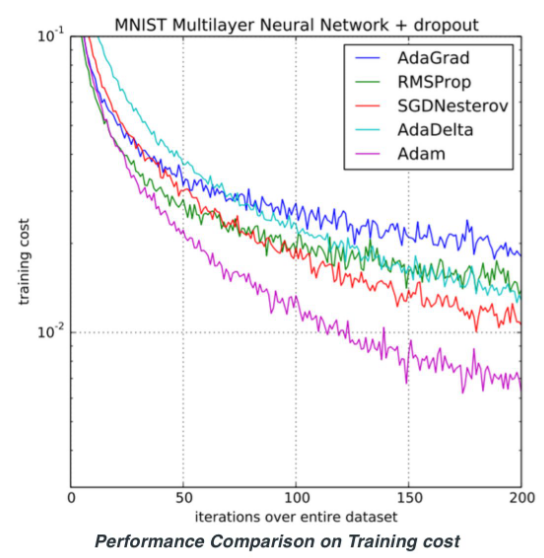

</center>

In [73]:
ANNMODEL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 🤹Training the model


In [74]:
print((norm_train.shape, y_trainDeep.shape))
print((norm_test.shape, y_testDeep.shape))

((112799, 784), (112799, 47))
((18799, 784), (18799, 47))


In [76]:
history4 = ANNMODEL.fit(
    norm_train, 
    y_trainDeep, 
    validation_data=(norm_test,y_testDeep), 
    epochs=10, 
    batch_size=200, 
    verbose=2)


Epoch 1/10
564/564 - 13s - loss: 0.5738 - accuracy: 0.8111 - val_loss: 0.5560 - val_accuracy: 0.8202 - 13s/epoch - 23ms/step
Epoch 2/10
564/564 - 11s - loss: 0.4710 - accuracy: 0.8395 - val_loss: 0.4954 - val_accuracy: 0.8379 - 11s/epoch - 20ms/step
Epoch 3/10
564/564 - 11s - loss: 0.4171 - accuracy: 0.8540 - val_loss: 0.4793 - val_accuracy: 0.8389 - 11s/epoch - 19ms/step
Epoch 4/10
564/564 - 11s - loss: 0.3771 - accuracy: 0.8654 - val_loss: 0.4590 - val_accuracy: 0.8468 - 11s/epoch - 19ms/step
Epoch 5/10
564/564 - 12s - loss: 0.3427 - accuracy: 0.8751 - val_loss: 0.4552 - val_accuracy: 0.8455 - 12s/epoch - 21ms/step
Epoch 6/10
564/564 - 13s - loss: 0.3185 - accuracy: 0.8812 - val_loss: 0.4618 - val_accuracy: 0.8499 - 13s/epoch - 22ms/step
Epoch 7/10
564/564 - 12s - loss: 0.2954 - accuracy: 0.8887 - val_loss: 0.4738 - val_accuracy: 0.8471 - 12s/epoch - 21ms/step
Epoch 8/10
564/564 - 12s - loss: 0.2766 - accuracy: 0.8947 - val_loss: 0.4865 - val_accuracy: 0.8464 - 12s/epoch - 21ms/step


In [77]:
ANNMODEL.save("ANN_Model.h5")

c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


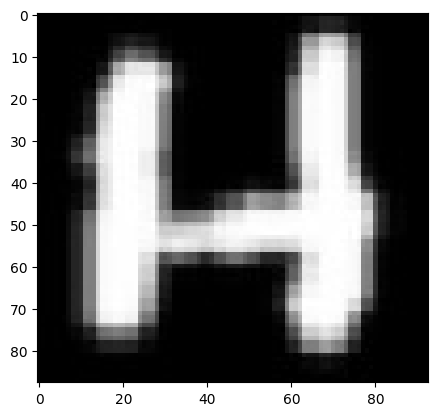

In [79]:
import cv2
img = cv2.imread('h.jpg')
plt.imshow(img)

In [81]:
img = cv2.resize(img, (28, 28))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
array = np.array(gray)/255.0
s = array.reshape(1, -1)
y_pred_test1 = ANNMODEL.predict(s)
y_pred_test1.shape
map_dict[y_pred_test1.argmax()]

1/1 [==============================] - 0s 30ms/step


'H'

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #ffd37a; font-family:verdana; color: #543800; border: 2px #543800 solid; border-radius: 15px">

<center>

## Generating CNN model

</center>
</div>

## 🏗️Import Libraries:


## Import all the required keras packages:

1) <strong>import Sequential:</strong> To intialaise our neural network model as a <span style="color:darkviolet">Sequential Network</span>, there are 2 basic ways of <strong>Intialising a neural network:</strong><center><span style="color:darkviolet">Sequence of layers</span> or as a <span style="color:darkviolet">Graph</span><span style="color:darkviolet">.</span></center>                                
<br>

2) <strong>import Conv2D:</strong> To perform the <span style="color:gray">first step</span> of CNN <span style="color:darkviolet">Convolution Operation</span>, since we are working on images, which a basically 2-D arrays, we are using <center><span style="color:darkviolet">Convolution 2-D</span> for <span style="color:darkviolet">images</span>, 
usually <span style="color:darkgoldenrod">3-D</span> is used only while dealing with <span style="color:darkgoldenrod">videos</span>, the <span style="color:darkgoldenrod">3rd dimension</span> will be <span style="color:darkgoldenrod">time</span>.</center>

<br>

3) <strong>import MaxPooling2D:</strong> To perform the <span style="color:gray">second step</span> of CNN <span style="color:darkviolet">Pooling Operation</span>, to build this particular neural network, we are using MaxPooling function, <center>there exist different types of<strong> Pooling Operations</strong> as <span style="color:darkviolet">Min</span>, <span style="color:darkviolet">Mean</span>, <span style="color:darkviolet">Average</span>, etc. In <span style="color:darkviolet">MaxPooling</span> we need the <span style="color:darkviolet">maximum value pixel</span> from the</center><center><span style="color:darkviolet">respective region of interest</span>.</center>

<br>

4) <strong>import Flatten:</strong> To perform the <span style="color:gray">third step</span> of CNN<span style="color:darkviolet"> Flattening</span>, To convert all the <span style="color:darkviolet">resultant 2-D arrays</span> into a <span style="color:darkviolet">single long continuous linear vector</span>.</center>  
                                 
<br>

5) <strong>import Dense:</strong> To perform the <span style="color:gray">forth step</span> of CNN <span style="color:darkviolet">Full Connection</span>, To perform the <span style="color:darkviolet">full connection</span> of the <span style="color:darkviolet">neural network</span>.
                                 
<br>

6) <strong>import Activation:</strong>  Activations can either be used through an <span style="color:darkviolet">Activation layer</span>, or through the <span style="color:darkviolet">activation argument</span> supported by all forward layers</span>.
                                 
<br>

7) <strong>import BatchNormalization:</strong>  a layer that  <span style="color:darkviolet">allows every layer</span> of the network to <span style="color:darkviolet">do learning</span> more <span style="color:darkviolet">independently</span>. It is used to <span style="color:darkviolet">normalize the output</span> of the <center><span style="color:darkviolet">previous layers</span>. The activations scale the input layer in normalization. Using batch normalization learning</center><center> becomes <span style="color:darkviolet">efficient</span> also it can be used as <span style="color:darkviolet">regularization</span> to <span style="color:darkviolet">avoid overfitting</span> of the model.</center>
                                 
<br>

8) <strong>import Dropout:</strong> <span style="color:darkviolet">regularization technique</span> that is used to <span style="color:darkviolet">prevent overfitting in the model</span>. Dropouts are added to randomly <span style="color:darkviolet">switching</span> some <span style="color:darkviolet">percentage</span> of <center><span style="color:darkviolet">neurons</span> of the network. When the neurons are <span style="color:darkviolet">switched off</span> the incoming and outgoing connection to those neurons is also switched off. </center> <center>This is done to <span style="color:darkviolet">enhance</span> the <span style="color:darkviolet">learning of the model</span>. It is always <span style="color:darkgoldenrod">good</span> to only <span style="color:darkgoldenrod">switch off</span> the neurons to <span style="color:darkgoldenrod">50%</span>. If we switched off </center><center><span style="color:darkviolet">more than 50%</span> then there can be chances when the <span style="color:darkviolet">model leaning would be poor</span> and the predictions will not be good. </center>
<br>

9) <strong>import Adamax:</strong> <span style="color:gray">Adamax optimizer</span> It's particularly well-suited for problems with <span style="color:darkviolet">large datasets</span> or <span style="color:darkviolet">high-dimensional</span> parameter spaces.
                                 
<br>
  

In [86]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adamax

## Initializing the CNN

Create an object of the <span style="color:darkviolet">Sequential class</span>.

 <strong><span style="color:darkgoldenrod">Input layer</span>:</strong> it's the input image data. the <span style="color:darkviolet">image</span> will be <span style="color:darkviolet">reshaped</span> into a <span style="color:darkviolet">1-D array</span>, so if the image is <span style="color:darkviolet">28 * 28 </span>as in our case it will be = <span style="color:darkviolet">784</span> , <center>it will be converted to <span style="color:darkviolet">(784,1) array</span>.</center>

In [87]:
CNN_Model = Sequential()

## Step 1: Convolution

Adding a convolution layer by using <span style="color:darkviolet">Conv2D</span> on an object already has an idea of how neural network is going to be squential. <center>It's responsible for <span style="color:darkviolet">extracting features</span> from the image.</center>                                                     

<br>



1) Number of Filters to be applied = <span style="color:darkviolet">32</span>, 
2) Filter's shape or Kernal size = <span style="color:darkviolet">5 * 5</span>, <br>
3) padding = <span style="color:darkviolet">same</span>, _ensures that the output of the convolution operation has the same spatial dimensions as the input_.<br>
4) Resolution = <span style="color:darkviolet">28 * 28</span>, <br>
5) Colored images "<span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span> = <span style="color:darkviolet">3</span>, but in our case it is grayscale so the value will be <span style="color:darkviolet">1</span>
<br>
6) Activation function used is <span style="color:darkviolet">Rectifier function</span>.

<br>

<strong>Why Not Using <span style="color:darkgoldenrod">Sigmoidal</span> Functions rather than <span style="color:darkgoldenrod">Rectified</span> in CNNs?</strong> 
<br>

1) <span style="color:darkviolet">ReLU </span>helps to <span style="color:darkviolet">prevent</span> the <span style="color:darkviolet">exponential growth</span> in the <span style="color:darkviolet">computation</span> required to operate the neural network.

2) <span style="color:darkviolet">ReLU </span>helps to <span style="color:darkviolet">prevent</span> the <span style="color:darkviolet">vanishing gradient</span> which is common when using sigmoidal functions. This problem refers to the <span style="color:darkviolet">tendency</span> for the<center> <span style="color:darkviolet">gradient</span> of a <span style="color:darkviolet">neuron</span> to <span style="color:darkviolet">approach zero</span> for <span style="color:darkviolet">high values</span> of the <span style="color:darkviolet">input</span>.</center>

<br>
<center>

![image info](https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/d-relu-d-x.png)

</center>
<br>

While <span style="color:darkgoldenrod">sigmoidal functions</span> have <span style="color:darkgoldenrod">derivatives</span> that <span style="color:darkgoldenrod">tend to 0</span> as they <span style="color:darkgoldenrod">approach positive infinity</span>, <span style="color:darkviolet">ReLU always remains</span> at a <span style="color:darkviolet">constant 1</span>. <br>
This allows <span style="color:darkviolet">backpropagation</span> of the <span style="color:darkviolet">error</span> and <span style="color:darkviolet">learning</span> to <span style="color:darkviolet">continue</span>, even for high values of the input to the activation function.

In [88]:
CNN_Model.add(Conv2D(filters=32, kernel_size = (5, 5), padding="same", input_shape = (28, 28, 1), activation = 'relu'))

## Batch Normalization

<br>

<center><span style="color:darkgoldenrod">Not Normalizing</span> the data before training can cause problems, making it <span style="color:darkviolet">drastically harder</span> to <span style="color:darkviolet">train</span> and <span style="color:darkviolet">decrease</span> its <span style="color:darkviolet">learning speed</span>.</center>

<br>

<center><span style="color:darkgoldenrod">Batch Norm</span> is a normalization technique done <span style="color:darkviolet">between</span> the <span style="color:darkviolet">layers</span> of a Neural Network <span style="color:darkviolet">instead</span> of in the <span style="color:darkviolet">raw data</span>. It is done along </center><center><span style="color:darkviolet">mini-batches</span>  <span style="color:darkviolet">instead </span> of the <span style="color:darkviolet">full data set</span>. It serves to <span style="color:darkviolet">speed up training</span>  and use <span style="color:darkviolet">higher learning rates</span> , making <span style="color:darkviolet">learning easier</span>.</center>

<br>
<center>

![image info](https://www.baeldung.com/wp-content/uploads/sites/4/2020/10/neural-network.png)

</center>
<br>
<br>

<center><span style="color:darkgoldenrod">Batch Norm</span> in the image represented with a <span style="color:darkgoldenrod">red line</span> – is <span style="color:darkviolet">applied</span> to the <span style="color:darkviolet">neurons’ output</span> just <span style="color:darkviolet">before applying</span> the <span style="color:darkviolet">activation function</span>.</center>

In [20]:
CNN_Model.add(BatchNormalization())

## Step 2: Pooling

The primary aim of a <span style="color:darkviolet">Pooling operation</span> is to <span style="color:darkgoldenrod">reduce the size of the images</span> as much as possible, by trying to <span style="color:darkgoldenrod">reduce the total number of nodes</span> for the upcoming layers. The <span style="color:darkgoldenrod">2*2 matrix</span> we will have the <span style="color:darkgoldenrod">minimum pixel loss</span> and get a precise region where the <span style="color:darkgoldenrod">feature are located</span>.

<br>
<span style="color:darkviolet">Strides=2</span>: This parameter specifies the stride of the pooling operation. In this case, it's set to 2, which means the pooling operation will <span style="color:darkgoldenrod">move by 2 pixels at each step</span>. Setting the stride to 2 reduces the spatial dimensions by a factor of 2.

<br>
<br>

<center><span style="color:darkviolet">Reducing the model complexity without reducing it's performance</span>.<center>
    
 

In [89]:
CNN_Model.add(MaxPooling2D(strides=2))

## Dropout

The <span style="color:darkgoldenrod">Dropout layer</span> is a mask that <span style="color:darkviolet">nullifies</span> the contribution of <span style="color:darkviolet">some neurons towards the next layer</span> and <span style="color:darkviolet">leaves unmodified all others</span>. <center>We can also apply it to a <span style="color:darkviolet">hidden layer</span>, in which case it <span style="color:darkviolet">nullifies some hidden neurons</span>.</center>

<br>
<center>

![image info](https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/2-1-2048x745-1.jpg)

</center>
<br>
<br>

<center>

<span style="color:darkgoldenrod">Dropout layers</span> are <span style="color:darkviolet">important</span> in <span style="color:darkviolet">training CNNs</span> because they <span style="color:darkviolet">prevent overfitting</span> on the training data. If they <span style="color:darkviolet">aren’t present</span>, the first batch of training samples influences the learning in a <span style="color:darkviolet">disproportionately high manner</span>. This, in turn, would prevent the learning of features that appear only in later samples or batches.

</center>

In [22]:
CNN_Model.add(Dropout(0.25))

## Adding other iterations of 'Filtering' and 'Max Pooling'

A best practice in each iteration increase the number of filters to apply to its double (and keep the value to be 1 of the powers of 2)

    padding='valid': This parameter determines the padding strategy. 'valid' padding means no padding is applied to the input data, resulting in a smaller output size compared to the input size. Only complete overlaps are considered during the convolution operation.

In [90]:
CNN_Model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
CNN_Model.add(MaxPooling2D(strides=2))

## Step 3: Flattening

Convert all the pooled images into a continuous vector through <span style="color:darkviolet">Flattening</span>:
<br><center>Taking the 2-D array, i.e <span style="color:darkviolet">pooled image pixels</span> and converting them to a <span style="color:darkviolet">one dimensional single vector</span>.</center> 

In [91]:
CNN_Model.add(Flatten())

## Step 4: Full Connection

We are going to connect the set of nodes we got after the flattening step, these nodes will act as an input layer to these <span style="color:darkviolet">fully-connected layers</span>.
<br><center>The layer will be <span style="color:darkviolet">present between the input and output layers</span>, we can refer to it a <span style="color:darkviolet">hidden layer</span>.</center>

<br>
<strong>Dense:</strong> is the function to <span style="color:darkviolet">add fuly connected layer</span>, '<span style="color:darkgoldenrod">units</span>', is where we define the <span style="color:darkgoldenrod">number of nodes that should be present in this hidden layer</span>, these units value will be always between the number of input nodes and the output nodes but
<br>
<center><br>The art of choosing the most optimal number of nodes can be achieved only through <span style="color:darkviolet">experimental tries</span>.</center> 
<center>It's a common practice to <span style="color:darkviolet">use the powers of 2</span>, And the activation function will be <span style="color:darkviolet">rectifier function</span>.<center>

In [92]:
CNN_Model.add(Dense(units = 256, activation = 'relu'))
CNN_Model.add(Dense(units = 84, activation = 'relu'))

## Intialize OUTPUT:


<bold>I)</bold> The output layer contians <strong>47 nodes</strong>, 
<br><center>As it's <span style="color:darkviolet">multi-class classification</span>. This nodes will calculate the<span style="color:darkviolet"> relative probabilities</span> for each class.</center>


As the final layer contains only <span style="color:darkviolet">more than 1 node</span>, so the given output will be <span style="color:darkviolet">multi-class</span>, so the <span style="color:darkviolet">activation function</span> used is <span style="color:darkviolet">softmax</span>.

```
CNN_Model.add(Dense(units = 47, activation='softmax')) 
```

<br>

#### Note:

<center>When the number of <span style="color:darkgoldenrod">classes is two</span>, <span style="color:darkviolet">softmax</span> becomes the <span style="color:darkviolet">same</span> as the <span style="color:darkviolet">sigmoid</span> activation function.</center>

In [93]:
CNN_Model.add(Dense(47, activation='softmax'))

## Compiling CNN Model:

<br>

<center><span style="color:darkgoldenrod">After we have completed building our CNN model, it's time to compile it.</span></center>

<br>

1) <strong>Optimizer:</strong> 
This line instantiates an <span style="color:darkviolet">Adamax optimizer</span> object with a specified <span style="color:darkviolet">learning rate of 0.001</span>.

2) <strong>Loss:</strong> 
To choose the <span style="color:darkviolet">loss function </span>This loss function is commonly used for <span style="color:darkviolet">multi-class</span> classification problems where the output labels are <span style="color:darkgoldenrod">one-hot encoded</span>.

3) <strong>Metrics:</strong> 
To choose the <span style="color:darkviolet">performance metric</span>.

In [94]:
CNN_Model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

# Part 3: Enhancing the learning operation

<br>

<strong><code><span style="color:darkgoldenrod">keras.callbacks</span></code></strong>
 A callback is an object that can perform <span style="color:darkviolet">actions</span> at <span style="color:darkviolet">various stages of training</span> <center>(e.g. at the start or end of an epoch, before or after a single batch, etc).</center>
 
<br>

1) <strong>import Early stopping: </strong> <span style="color:darkviolet">Stop training</span> when a monitored <span style="color:darkviolet">metric</span> has <span style="color:darkviolet">stopped improving</span>.

2) <strong>import ReduceLROnPlateau: </strong> <span style="color:darkviolet">Reduce learning rate</span> when a monitored <span style="color:darkviolet">metric</span> has <span style="color:darkviolet">stopped improving</span>.

In [97]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

### Early Stop

<br>

<center>To <span style="color:darkviolet">prevent over fitting</span> we will <span style="color:darkviolet">stop</span> the learning <span style="color:darkviolet">after 10 epochs</span> and <span style="color:darkgoldenrod">val_loss</span> value  <span style="color:darkgoldenrod">not decreased</span>.</center>

In [28]:
earlystop = EarlyStopping(patience=10)

### Learning Rate Reduction

<br>

<center><span style="color:darkviolet">Reduce learning rate </span> when the <span style="color:darkgoldenrod">accuracy </span> value <span style="color:darkgoldenrod">not increase</span> for <span style="color:darkviolet">2</span> steps.</center>

### Parameter: 

1) <strong>Monitor: </strong> quantity to be <span style="color:darkviolet">monitored</span>.

2) <strong>Patience: </strong> number of <span style="color:darkviolet">epochs</span> with <span style="color:darkviolet">no improvement</span> after which <span style="color:darkviolet">learning rate</span> will be <span style="color:darkviolet">reduced</span>.

3) <strong>Verbose: </strong>  <span style="color:darkgoldenrod">0</span>: <span style="color:darkgoldenrod">quiet</span>, <span style="color:darkviolet">1</span>: <span style="color:darkviolet">update messages</span>.

4) <strong>Factor: </strong>  <span style="color:darkviolet">factor</span> by which the <span style="color:darkviolet">learning rate</span> will be <span style="color:darkviolet">reduced</span>. <code>new_lr = lr * factor</code>.

5) <strong>Min_lr: </strong>  <span style="color:darkviolet">lower bound</span> on the <span style="color:darkviolet">learning rate</span>.

In [100]:
MCP = ModelCheckpoint('CNN_Model.h5',
                      verbose=1,
                      save_best_only=True,
                      monitor='val_accuracy',
                      mode='max')
ES = EarlyStopping(monitor='val_accuracy',
                   min_delta=0,
                   verbose=0,
                   restore_best_weights = True,
                   patience=3,
                   mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',
                        patience=3,
                        factor=0.2,
                        min_lr=0.0001)

# Part 4: Fitting the model

### Fit
<center><span style="color:darkviolet">Trains</span> the model for a <span style="color:darkviolet">fixed number</span> of <span style="color:darkviolet">epochs</span> (dataset iterations)</center>

### Parameter: 

1) <strong>Validation_data: </strong> Data on which to<span style="color:darkviolet"> evaluate</span> the <span style="color:darkviolet">loss</span> and any model metrics at the <span style="color:darkviolet">end of each epoch</span>. The model will not be trained on this data. 

2) <strong>Validation_steps: </strong> Only relevant if <code><span style="color:darkviolet"> validation_data</span></code> is provided and is a tf.data dataset. <span style="color:darkviolet">Total numbe</span>r of <span style="color:darkviolet">steps</span> (batches of samples) <center>to draw <span style="color:darkviolet">before stopping</span> when <span style="color:darkviolet">performing validation</span> at the end of every epoch.</center>

3) <strong>Steps_per_epoch: </strong>  <span style="color:darkviolet">Total number</span> of <span style="color:darkviolet">steps</span> (batches of samples) <span style="color:darkviolet">before declaring one epoch finished</span> and starting the next epoch.

4) <strong>Callbacks: </strong>  List of <code><span style="color:darkviolet">keras.callbacks.Callback</span></code> instances. List of callbacks to <span style="color:darkviolet">apply during training</center>.

5) <strong>verbose: </strong> This parameter controls the verbosity of the training process. <br> <center>A <code><span style="color:darkviolet">value of 1</span></code> indicates that progress bars will be displayed during training, <span style="color:darkviolet">showing the training progress for each epoch.</span>


## 🤹Training the model

In [134]:
print((x_trainDeep.shape, y_trainDeep.shape))
print((x_testDeep.shape, y_testDeep.shape))

((112799, 28, 28, 1), (112799, 47))
((18799, 28, 28, 1), (18799, 47))


In [101]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('CNN_Model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')
history = CNN_Model.fit(x_trainDeep,
                        y_trainDeep,
                        epochs=5, 
                        batch_size=32, 
                        verbose=1, 
                        validation_split=0.1,
                        callbacks=[early_stopping, mcp_save])

Epoch 1/5
3172/3173 [============================>.] - ETA: 0s - loss: 0.6358 - accuracy: 0.7950
Epoch 1: val_loss improved from inf to 0.41424, saving model to CNN_Model.h5
3173/3173 [==============================] - 222s 69ms/step - loss: 0.6357 - accuracy: 0.7950 - val_loss: 0.4142 - val_accuracy: 0.8531
Epoch 2/5


c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3173/3173 [==============================] - ETA: 0s - loss: 0.3694 - accuracy: 0.8670
Epoch 2: val_loss improved from 0.41424 to 0.38317, saving model to CNN_Model.h5
3173/3173 [==============================] - 241s 76ms/step - loss: 0.3694 - accuracy: 0.8670 - val_loss: 0.3832 - val_accuracy: 0.8614
Epoch 3/5
3173/3173 [==============================] - ETA: 0s - loss: 0.3157 - accuracy: 0.8836
Epoch 3: val_loss improved from 0.38317 to 0.36027, saving model to CNN_Model.h5
3173/3173 [==============================] - 274s 86ms/step - loss: 0.3157 - accuracy: 0.8836 - val_loss: 0.3603 - val_accuracy: 0.8724
Epoch 4/5
3173/3173 [==============================] - ETA: 0s - loss: 0.2804 - accuracy: 0.8942
Epoch 4: val_loss improved from 0.36027 to 0.35508, saving model to CNN_Model.h5
3173/3173 [==============================] - 277s 87ms/step - loss: 0.2804 - accuracy: 0.8942 - val_loss: 0.3551 - val_accuracy: 0.8734
Epoch 5/5
3172/3173 [============================>.] - ETA: 0s - los

In [45]:
CNN_Model.save("CNN_Model.h5")

c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


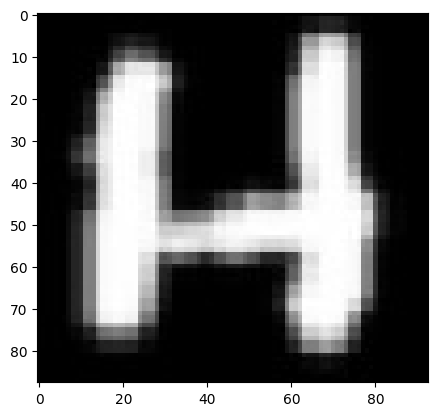

In [104]:
import cv2
img = cv2.imread('h.jpg')
plt.imshow(img)

In [105]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_resized = cv2.resize(gray, (28, 28))

gray_reshaped = gray_resized.reshape(1, 28, 28, 1)

print(gray_reshaped.shape)  

(1, 28, 28, 1)


In [107]:
#Prediction
pred = CNN_Model.predict(gray_reshaped)
# Finding shape
pred.shape

1/1 [==============================] - 0s 99ms/step


(1, 47)

In [108]:
map_dict[pred.argmax()]

'H'

## Plotting the results

In [102]:
def plotgraph(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

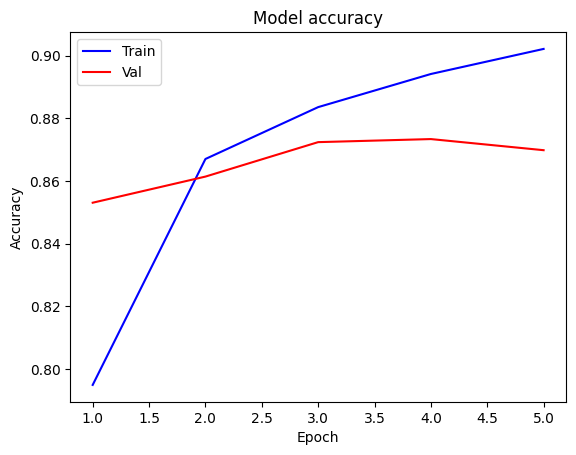

In [103]:
plotgraph(epochs, acc, val_acc)

<div class="alert alert-block alert-info" style="font-size:20px; background-color: #5642C5; font-family:verdana; color: white; border: 2px #5642C5 solid; border-radius: 15px">

<center>

## Generating Random Forest

</center>
</div>

## 🏗️Import Libraries:

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# render plots in the notebook without opening a new window
%matplotlib inline

## Splitting the data:

🐼 Why 70% - 30% for train/val set ?
- When using an <span style="color:darkgoldenrod">80-20 split</span> , the model is <span style="color:darkgoldenrod">more prone to overfitting</span> the training set.

In [11]:
norm_train.shape, y_train.shape

((112799, 784), (112799,))

In [12]:
x_train, x_val, y_train, y_val = train_test_split(norm_train, y_train, test_size = 0.3, random_state = 42)

## 🤹Training the model

<center>

🐼 _randomState_ parameter sets a <span style="color:darkgoldenrod">fixed seed</span> for the random number generator used in the algorithm in order to have <span style="color:darkgoldenrod">reproducible results</span> 🐼<br>
🐼 _criterion_ parameter specifies the function to <span style="color:darkgoldenrod">measure the quality</span> of a split when creating the <span style="color:darkgoldenrod">decision trees</span> 🐼<br>
🐼 _logarithmic_ loss or _cross-entropy_ loss, which is suitable for <span style="color:darkgoldenrod">classification tasks</span> 🐼

</center>

In [13]:
y_val.shape, x_val.shape

((33840,), (33840, 784))

In [14]:
x_train.shape,y_train.shape

((78959, 784), (78959,))

In [15]:
rf = RandomForestClassifier(random_state = 42, criterion = "log_loss",max_depth=27, n_estimators=285)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=27, n_estimators=285,
                       random_state=42)

## Getting predictions

In [17]:
y_pred = rf.predict(x_train)
print("Training accuracy: " + str(accuracy_score(y_train, y_pred)))
y_pred = rf.predict(x_val)
print("Validation accuracy: " + str(accuracy_score(y_val, y_pred)))
y_pred = rf.predict(norm_test)
print("Test accuracy: " + str(accuracy_score(y_test, y_pred)))

Training accuracy: 0.9999620055978419
Validation accuracy: 0.8096926713947991
Test accuracy: 0.8098303101228789


### Map the predictions and actual values (0-46) to the unicode values and compare the the predictions with the actual values


In [117]:
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {map_dict[pred]}, Actual: {map_dict[true]}")

Predicted: e, Actual: e
Predicted: 9, Actual: 9
Predicted: Q, Actual: Q
Predicted: 9, Actual: q
Predicted: X, Actual: X
Predicted: E, Actual: E
Predicted: A, Actual: B
Predicted: 3, Actual: 3
Predicted: 6, Actual: C
Predicted: G, Actual: G
Predicted: 7, Actual: 7
Predicted: Z, Actual: 2
Predicted: G, Actual: G
Predicted: O, Actual: G
Predicted: R, Actual: R
Predicted: 6, Actual: 6
Predicted: q, Actual: q
Predicted: S, Actual: S
Predicted: r, Actual: r
Predicted: T, Actual: T
Predicted: 8, Actual: 8
Predicted: 4, Actual: 4
Predicted: Z, Actual: Z
Predicted: e, Actual: e
Predicted: F, Actual: f
Predicted: e, Actual: e
Predicted: X, Actual: X
Predicted: b, Actual: b
Predicted: 9, Actual: G
Predicted: C, Actual: C
Predicted: L, Actual: L
Predicted: S, Actual: S
Predicted: f, Actual: f
Predicted: n, Actual: n
Predicted: C, Actual: C
Predicted: K, Actual: K
Predicted: Q, Actual: Q
Predicted: C, Actual: C
Predicted: 1, Actual: 1
Predicted: b, Actual: b
Predicted: b, Actual: b
Predicted: q, Ac

## Hyperparameter Tuning

🐼 `from scipy.stats import randint` :
1) use because RandomizedSearchCV takes a <span style="color:darkgoldenrod">random distribution of values</span> from the parameters and not a single value.

<br>

🐼 `param_dist = {'n_estimators': randint(50,600), 'max_depth': randint(1,30)}` :
1) create a dictionary to specify the <span style="color:darkgoldenrod">parameter values</span> with ranges of random numbers.
2) n_estimators parameter is the <span style="color:darkgoldenrod">number of decision trees</span> in the rf.
3) max_depth is the <span style="color:darkgoldenrod">maximum depth of each <span style="color:darkgoldenrod">decision tree</span>, the higher it is the more prone to overfitting, and vice versa.

<br>

🐼 `rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=2, ncv=2) ` :
1) Use random search to find the <span style="color:darkgoldenrod">best hyperparameters</span>.
2) RandomizedSearchCV performs a randomized search over the specified hyperparameter distributions to find the <span style="color:darkgoldenrod">best combination</span> of hyperparameters. 
3) RandomizedSearchCV will <span style="color:darkgoldenrod">train an n number of models</span> and the best model is saved in the rand_search var.
4) _n__ _iter = 2_ number of <span style="color:darkgoldenrod">models it will train</span>
5) _cv = 2_  <span style="color:darkgoldenrod">cross-validation</span> procedure will be repeated cv times

In [47]:
import random
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint #use because RandomizedSearchCV takes a random distribution of values from the parameters and not a single value

# create a dictionary to specify the parameter values with ranges of random numbers
# n_estimators parameter is the number of decision trees in the rf
# max_depth is the maximum depth of each decision tree, the higher it is the more prone to overfitting, and vice versa
param_dist = {'n_estimators': randint(50,600),
              'max_depth': randint(1,30)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
# RandomizedSearchCV performs a randomized search over the specified hyperparameter distributions to find the best combination of hyperparameters 
# RandomizedSearchCV will train an n number of models and the best model is saved in the rand_search var
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=20, # number of models it will train
                                 cv=2) # cross-validation procedure will be repeated cv times

# Fit the random search object to the data
rand_search.fit(norm_train, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A2853EA10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016A2857DF90>})

In [46]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 11, 'n_estimators': 529}


### Use the best model values in prediction

In [39]:
# predict the values using the best model
y_pred = rand_search.predict(norm_test)

In [40]:
#compare the predicted and actual values
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {map_dict[pred]}, Actual: {map_dict[true]}")

Predicted: e, Actual: e
Predicted: 9, Actual: 9
Predicted: Q, Actual: Q
Predicted: 9, Actual: q
Predicted: X, Actual: X
Predicted: E, Actual: E
Predicted: A, Actual: B
Predicted: 3, Actual: 3
Predicted: 8, Actual: C
Predicted: G, Actual: G
Predicted: 7, Actual: 7
Predicted: Z, Actual: 2
Predicted: G, Actual: G
Predicted: 0, Actual: G
Predicted: a, Actual: R
Predicted: 6, Actual: 6
Predicted: Q, Actual: q
Predicted: S, Actual: S
Predicted: 8, Actual: r
Predicted: T, Actual: T
Predicted: 8, Actual: 8
Predicted: 4, Actual: 4
Predicted: a, Actual: Z
Predicted: e, Actual: e
Predicted: P, Actual: f
Predicted: e, Actual: e
Predicted: X, Actual: X
Predicted: b, Actual: b
Predicted: 9, Actual: G
Predicted: C, Actual: C
Predicted: L, Actual: L
Predicted: S, Actual: S
Predicted: f, Actual: f
Predicted: n, Actual: n
Predicted: C, Actual: C
Predicted: K, Actual: K
Predicted: Q, Actual: Q
Predicted: C, Actual: C
Predicted: 1, Actual: 1
Predicted: b, Actual: b
Predicted: b, Actual: b
Predicted: q, Ac

In [18]:
# check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8098303101228789


### Evaluating model using confusion matrix

1) The ***confusion matrix*** represents the <span style="color:darkgoldenrod">relationship</span> between the <span style="color:darkgoldenrod">actual values</span> and the <span style="color:darkgoldenrod">predicted values</span> of the model in order to evaluate it's preformance.
2) The ***rows*** are the <span style="color:darkgoldenrod">actual values</span>. 
3) The ***columns*** are the <span style="color:darkgoldenrod">predicted values</span>.
4) The ***numbers inside the matrix*** represent the <span style="color:darkgoldenrod">counts</span> of instances that fall into each combination of <span style="color:darkgoldenrod">actual and <span style="color:darkgoldenrod">predicted classes</span>.
5) The ***colored diagonal*** represents the values that were <span style="color:darkgoldenrod">predicted correctly</span> (Representing the true postives and true negatives).
6) The ***off-diagonal*** cells represent the <span style="color:darkgoldenrod">incorrectly predicted values</span> (Representing the false postives and false negatives).
7) The ***colored off-diagonal*** cells bring attention to the <span style="color:darkgoldenrod">bigger count of predictions that were incorrect</span>, the <span style="color:darkgoldenrod">larger</span> the number the <span style="color:darkgoldenrod">darker</span> the color.

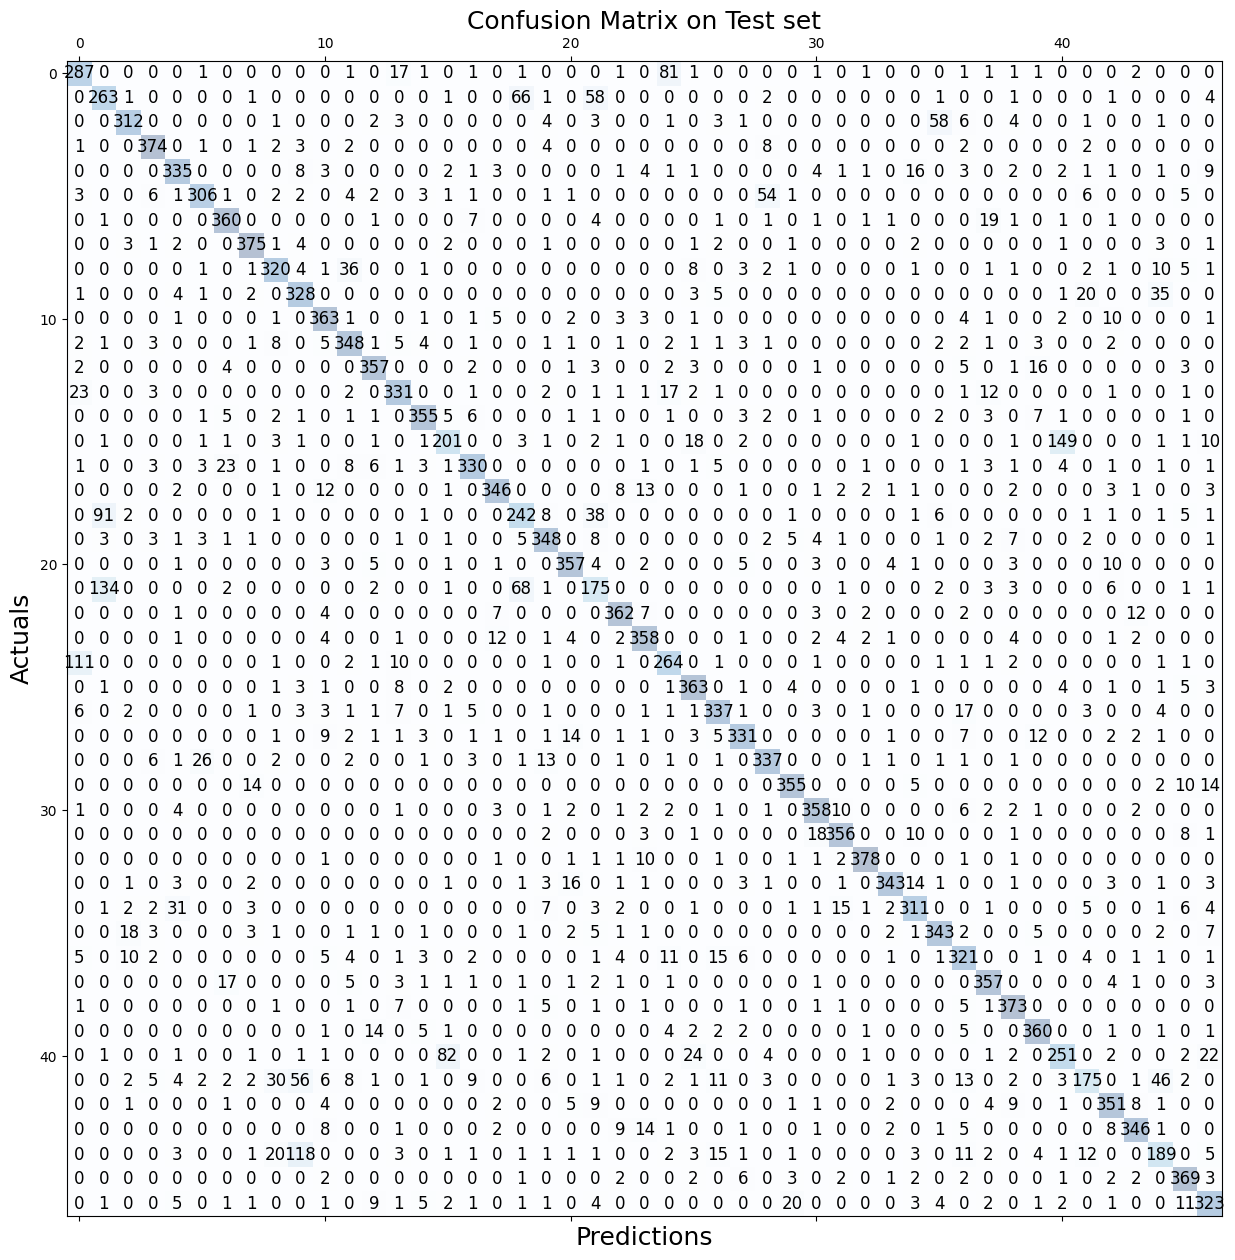

In [19]:
matrix = confusion_matrix(y_test,y_pred) #create confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix on Test set', fontsize=18)
plt.show()

### 🐼Note:

1) ***accuracy*** is the ratio between the <span style="color:darkgoldenrod">true predictions</span> and the <span style="color:darkgoldenrod">total predictions</span><br><center> `(TP + TN) / (TP + TN + FP + FN)`</center><br>
2) ***precision*** indicates that when the model predicts a <span style="color:darkgoldenrod">positive instance</span>, it is likely to be <span style="color:darkgoldenrod">correct</span><br><center> `TP / (TP + FP)`</center><br>
3) ***recall*** indicates that the model is good at identifying most of the <span style="color:darkgoldenrod">positive instances</span>, but it may have a <span style="color:darkgoldenrod">high number of false positives</span><br><center> `TP / (TP + FN)`</center><br>

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#accuracy is the ratio between the true predictions and the total predictions (TP + TN) / (TP + TN + FP + FN)
#precision indicates that when the model predicts a positive instance, it is likely to be correct TP / (TP + FP)
#recall indicates that the model is good at identifying most of the positive instances, but it may have a high number of false positives TP / (TP + FN)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8098303101228789
Precision: [0.6463964  0.52811245 0.88135593 0.90997567 0.83541147 0.88439306
 0.86124402 0.91463415 0.8        0.61654135 0.83066362 0.81118881
 0.87931034 0.82338308 0.91025641 0.6525974  0.88235294 0.90339426
 0.6142132  0.83453237 0.87286064 0.53680982 0.89162562 0.8463357
 0.66835443 0.82312925 0.82800983 0.88978495 0.8062201  0.89873418
 0.87960688 0.8989899  0.96183206 0.94490358 0.82712766 0.80896226
 0.75707547 0.85611511 0.87558685 0.87591241 0.59198113 0.74786325
 0.84782609 0.91052632 0.61967213 0.84633028 0.76359338]
Recall: [0.7175     0.6575     0.78       0.935      0.8375     0.765
 0.9        0.9375     0.8        0.82       0.9075     0.87
 0.8925     0.8275     0.8875     0.5025     0.825      0.865
 0.605      0.87       0.8925     0.4375     0.905      0.895
 0.66       0.9075     0.8425     0.8275     0.8425     0.8875
 0.895      0.89       0.945      0.8575     0.7775     0.8575
 0.8025     0.8925     0.9325     0.9        0.6275   

## Saving RF model

In [22]:
import pickle

# Save the model to a file
filename = 'random_forest.pkl'
pickle.dump(rf, open(filename, 'wb'))

<div class="alert alert-block alert-info" style="font-size:20px; border-radius : 15; background-color: #F0E6D6; font-family:verdana; color: #4B3F72; border: 2px #003819 solid; border-radius: 15px;">

<center>

## Generating ANN model

</center>
</div>

## Loading the 3 models

<center>

<span style = "color: #5642C5; font-weight: bold; font-size:20px;">🐼 RF 🐼 ANN 🐼 CNN 🐼
</center>

In [4]:
import joblib
import tkinter as tk
import numpy as np
import cv2
import pandas as pd
from PIL import ImageTk, Image, ImageDraw
from keras.models import load_model

### RF:

In [5]:
rf_model=joblib.load('./random_forest.pkl')

### ANN

In [6]:
ann_model = load_model('./GUIMODELS/ANN_Model.h5')

### CNN

In [7]:
cnn_model = load_model('./GUIMODELS/CNN_Model.h5')

### Event Function:

<span  style = "font-size:20px;">

- <strong style = "font-size:20px;">🐼 Event: 🐼</strong> function designed to <span style = "color:darkgoldenrod;">respond to an event</span>, such as the <span style = "color:darkgoldenrod;">mouse click</span> or mouse movement, by crating visual elements on the canvas.
<br> 

- <strong style = "font-size:20px;">🐼 x, y: 🐼</strong> extract the <span style = "color:darkgoldenrod;">x</span> and <span style = "color:darkgoldenrod;">y</span> coordinates, the <span style = "color:darkgoldenrod;">mouse position</span>, by ```x = event.x``` and  ```y = event.y```
<br> 

- <strong style = "font-size:20px;">🐼 x1, y1: 🐼</strong> calculate the <span style = "color:darkgoldenrod;">top-left</span> of the  <span style = "color:darkgoldenrod;">square</span> with side length <span style = "color:darkgoldenrod;">60 </span>centered around the event coordinates ```x1 = x - 30``` and  ``` y1 = y - 30```
<br> 

- <strong style = "font-size:20px;">🐼 x2, y2: 🐼</strong> calculate the <span style = "color:darkgoldenrod;">bottom-right</span> of the  <span style = "color:darkgoldenrod;">square</span> with side length <span style = "color:darkgoldenrod;">60 </span>centered around the event coordinates ```x2 = x + 30``` and  ``` y2 = y + 30```
<br> 

- <strong style = "font-size:20px;">🐼 create_oval: 🐼</strong> Mainly to <span style = "color:darkgoldenrod;">draw the shape on the canvas</span>, so the drawn character can be <span style = "color:darkgoldenrod;">visualized</span>.
<br> 

- <strong style = "font-size:20px;">🐼 ellipse: 🐼</strong> Mainly to <span style = "color:darkgoldenrod;">draw the shape on the image</span> that will be <span style = "color:darkgoldenrod;">predicted by the models</span>, so the background is black of the image, and the color of the drawn character is white.
<br>

<strong style = "font-size:25px; color: red">🐼 Note:</strong>

- We chose the values to draw the square to be 60, as we noticed its the best value for the model prediction, as this makes the drawn character <span style = "color:darkgoldenrod;">thick</span> and <span style = "color:darkgoldenrod;">clear</span> for the model.

In [8]:
def event_function(event):
    x = event.x
    y = event.y
    x1 = x - 30
    y1 = y - 30
    x2 = x + 30
    y2 = y + 30

    canvas.create_oval((x1, y1, x2, y2), fill='#F0E6D6', outline='#F0E6D6')
    img_draw.ellipse((x1, y1, x2, y2), fill='white')

### Clear Function | reset the canvas ans the image:
<span  style = "font-size:20px;">

- <strong style = "font-size:20px;">🐼 img, img_draw: 🐼</strong> definig new  <span style = "color:darkgoldenrod;">img </span>variable and to be <span style = "color:darkgoldenrod;">global</span> so it can be accessed through all functions.
<br> 

- <strong style = "font-size:20px;">🐼 canvas.delete('all'): 🐼</strong>  clears the canvas <span style = "color:darkgoldenrod;">deleting</span> all the items.
<br> 

- <strong style = "font-size:20px;">🐼 img=Image.new('RGB',(500,500),(0,0,0)): 🐼</strong> creates a <span style = "color:darkgoldenrod;">new image</span> with the dimensions <span style = "color:darkgoldenrod;">500x500</span> pixels and a <span style = "color:darkgoldenrod;">black background</span>.
<br>

- <strong style = "font-size:20px;">🐼 last 4 lines: 🐼</strong> <span style = "color:darkgoldenrod;">update the text</span> displayed in the mentioned lables.
<br>

In [9]:
def clear():
    global img,img_draw
    
    canvas.delete('all')
    img=Image.new('RGB',(500,500),(0,0,0))
    img_draw=ImageDraw.Draw(img)    
    
    label_sentence.config(text='')
    rfModel_TEXT.config(text='RF is Waiting')
    ANNMODEL_TEXT.config(text='ANN Waiting :')
    CNNMODEL_TEXT.config(text='CNN Waiting :')

### Add Space Function:
<span  style = "font-size:20px;">

- Used to add spaces betwen each word to create a meaningful sentence.

In [10]:
def add_space():
    sentence_list.append(' ')
    label_sentence.config(text='SPACE ADDED')
    clear()

### Display Space Function:
<span  style = "font-size:20px;">

- Display the sentence.

In [11]:
def display_sentence():
    sentence = ''.join(sentence_list)
    label_sentence.config(text='SENTENCE: ' + sentence)

### Predict Function:
<span  style = "font-size:20px;">

- First make the preprocessing of the image, so the model can predict it easily, the preprocessing for both <span style = "color:darkgoldenrod;">ANN</span> and <span style = "color:darkgoldenrod;">RF</span> is the <span style = "color:darkgoldenrod;">same</span>, as well for the <span style = "color:darkgoldenrod;">CNN</span> except <span style = "color:darkgoldenrod;">single line for reshaping</span> the image to be suitable for the <span style = "color:darkgoldenrod;">CNN model input</span>. ```.reshape(1, 28, 28, 1)```

In [12]:
def predict():
    img_array = np.array(img)
    rrr = cv2.resize(img_array, (28, 28))

    gray = cv2.cvtColor(rrr, cv2.COLOR_BGR2GRAY)
    arra = np.array(gray) / 255.0
    s = arra.reshape(1,28,28)
    s = s.reshape(1, -1)

    y_pred_test1 = rf_model.predict(s)
    CHARRF = map_dict[y_pred_test1[0]]
    print(y_pred_test1)

    annpred = ann_model.predict(s)
    CHARANN = np.argmax(annpred,axis=1)
    CHARANN = map_dict[CHARANN[0]]
    
    gray_resized = cv2.resize(gray, (28, 28))
    gray_reshaped = gray_resized.reshape(1, 28, 28, 1)

    cnnpred = cnn_model.predict(gray_reshaped)
    CHARCNN = np.argmax(cnnpred, axis=1)
    CHARCNN = map_dict[CHARCNN[0]]
    
    #ADD LETTER TO LIST
    sentence_list.append(CHARCNN)
    
    rfModel_TEXT.config(text='RF PREDICTION : ' + CHARRF)
    ANNMODEL_TEXT.config(text='ANN PREDICTION:' + CHARANN)
    CNNMODEL_TEXT.config(text='CNN PREDICTION:' + CHARCNN)

In [14]:
win = tk.Tk()

canvas = tk.Canvas(win, width=500, height=500, bg='#829079')
canvas.grid(row=0, column=0, columnspan=6)

button_predict = tk.Button(win, text='PREDICT', bg='#829079', fg='#F0E6D6', font='Helvetica 20 bold', command=predict)
button_predict.grid(row=1, column=1)

button_clear = tk.Button(win, text='CLEAR', bg='#829079', fg='#F0E6D6', font='Helvetica 20 bold', command=clear)
button_clear.grid(row=1, column=2)

button_space = tk.Button(win, text='SPACE', bg='#829079', fg='#F0E6D6', font='Helvetica 20 bold', command=add_space)
button_space.grid(row=1, column=3)

button_display = tk.Button(win, text='DISPLAY', bg='#829079', fg='#F0E6D6', font='Helvetica 20 bold', command=display_sentence)
button_display.grid(row=1, column=4)



label_sentence = tk.Label(win, text='', bg='#F0E6D6', font='Helvetica 24 bold', fg='#5642C5')
label_sentence.grid(row=2, column=3, columnspan=3)

rfModel_TEXT = tk.Label(win, text='RF is Waiting:', bg='#F0E6D6', font='Helvetica 24 bold', fg='#003819')
rfModel_TEXT.grid(row=2, column=0, columnspan=3)

ANNMODEL_TEXT = tk.Label(win, text='ANN Waiting :', bg='#F0E6D6', font='Helvetica 24 bold', fg='#003819')
ANNMODEL_TEXT.grid(row=3, column=0, columnspan=3)

CNNMODEL_TEXT = tk.Label(win, text='CNN Waiting :', bg='#F0E6D6', font='Helvetica 24 bold', fg='#003819')
CNNMODEL_TEXT.grid(row=4, column=0, columnspan=3)

canvas.bind('<B1-Motion>', event_function)
img = Image.new('RGB', (500, 500), (0, 0, 0))
img_draw = ImageDraw.Draw(img)

sentence_list = []

win.mainloop()